In [18]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 6.8 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=195a13bbf31ba13b6c70d0b522a2080ccbbbdfee9eb132d788fc503f53d4232c
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [19]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

In [5]:
# MEMASUKAN KATA KUNCI
keywords=['wamil']
start="2022–10–16"
end ="2022–10–17"
max_num=100
fname='tweet.json' 
languages=['id','en']

In [20]:
import pandas as pd
datatw=[]

In [7]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
           # print(data)
            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                #print(line)
                f.write(line)
                f.write('\n')

In [8]:
datatw

["@luvintae_ Pas pulang wamil ngapain ya soalnya kalo mau nge'live kan dah diklaim 😞",
 'Sayang @BTS_twt aku berharap banget kalian 100% wamil, kalian manusia yg bisa cape dan bukan robot yg bisa di mainin sama manusia. Aku gamau kalian di jadiin sapi perah sama pemerintah korsel. https://t.co/a79nSUcb4F',
 'crop blouse lurik songket untuk outfit kondangan cakep nih\n🔗https://t.co/LaUMLLWJdp\n\nt. itzy we trust you wamil baekhyun bighit macbook ipad nokia editan pinggang rest of my live le sserafim #MEWxSUHO #apobangpo https://t.co/NLM9Qdt6E8',
 'tweet untuk mengisi keseharian selama ditinggal ayang wamil',
 '@honsoolatnight K army juga gak trima...biar mereka wamil semua..biar gak ada beban...lihat aja nanti..brita apa yang keluar nanti😂😂..kontribusi bts 0%5 B...itu bukan sedikit😝😝',
 '@chizikook_ Ilang rasa excited karna Jin mau wamil. Sialan emang, maaf banget kasar tapi, sumpah anjing',
 'Gw udh seneng banget mereka bakal wamil tpi pemerintah mlah kasih opsi yg bikin bangtan gak fo

In [9]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 6.5 MB/s 


In [10]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatw:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

In [11]:
documents_clean[0:5]

['luvintae pas pulang wamil ngapain soal kalo mau nge live kan dah klaim',
 'sayang bts twt aku harap banget kalian wamil kalian manusia yg cape bukan robot yg mainin sama manusia aku gamau kalian di jadiin sapi perah sama perintah korsel https t co ansucbf',
 'crop blouse lurik songket outfit kondangan cakep nih https t co laumllwjdp t itzy we trust you wamil baekhyun bighit macbook ipad nokia edit pinggang rest of my live le sserafim mewxsuho apobangpo https t co nlmqdte',
 'tweet isi hari lama tinggal ayang wamil',
 'honsoolatnight k army gak trima biar wamil semua biar gak beban lihat aja brita apa keluar kontribusi bts b bukan sedikit']

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

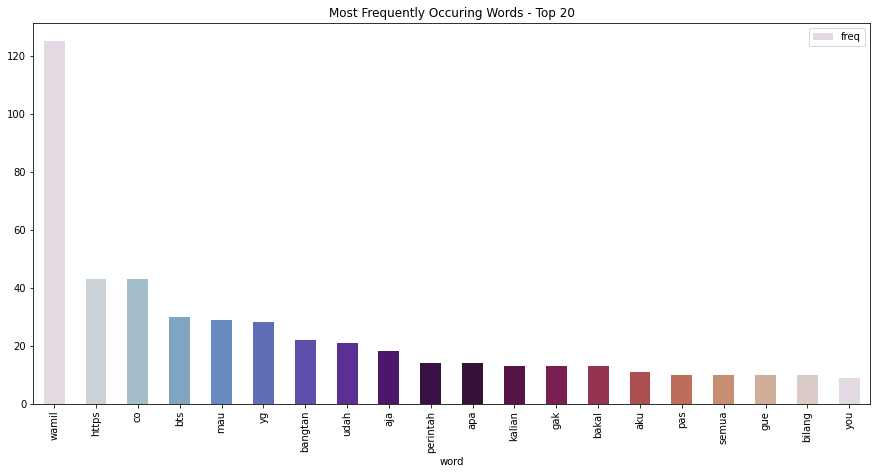

In [13]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [14]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [15]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 bakal
 grup
 iya
 beberapa
 mulai
 baru
 pasti
 wamil
 gitu
 cewekcantikadik
Cluster 1:
 co
 https
 of
 macbook
 rest
 edit
 pinggang
 ipad
 my
 wamil
Cluster 2:
 wamil
 https
 co
 bts
 mau
 yg
 bangtan
 udah
 aja
 apa




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


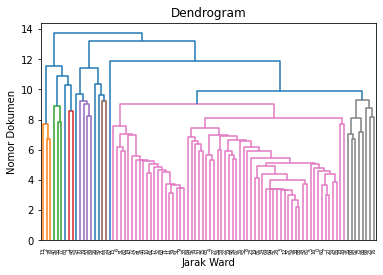

In [16]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

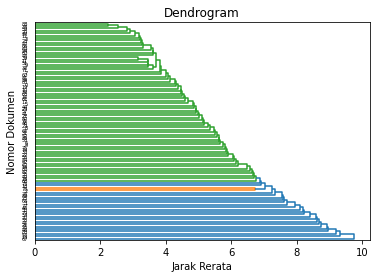

In [17]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right") 
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()